# Diabetes Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
url= "diabetic_data.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,0,250.83,?,?,1,None,None,No,No,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,0,276,250.01,255,9,None,None,Up,Ch,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,1,648,250,V27,6,None,None,No,No,Yes
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,0,8,250.43,403,7,None,None,Up,Ch,Yes
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,0,197,157,250,5,None,None,Steady,Ch,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
insulin                     0
change                      0
diabetesMed                 0
dtype: int64

## Cleaning Dataset

In [8]:
df['race'] = df['race'].replace("?","null")

In [9]:
df.drop(['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','medical_specialty','num_lab_procedures','num_procedures','num_medications','number_outpatient',
'number_emergency','number_inpatient','payer_code' ],axis='columns', inplace=True)

In [10]:
df.head()

,race,gender,age,weight,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed
0,Caucasian,Female,[0-10),?,250.83,?,?,1,None,None,No,No,No
1,Caucasian,Female,[10-20),?,276,250.01,255,9,None,None,Up,Ch,Yes
2,AfricanAmerican,Female,[20-30),?,648,250,V27,6,None,None,No,No,Yes
3,Caucasian,Male,[30-40),?,8,250.43,403,7,None,None,Up,Ch,Yes
4,Caucasian,Male,[40-50),?,197,157,250,5,None,None,Steady,Ch,Yes


In [11]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
null                2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [12]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [13]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [14]:
df['age'] = df['age'].replace("[0-10)","0")
df['age'] = df['age'].replace("[10-20)","0")
df['age'] = df['age'].replace("[20-30)","0")
df['age'] = df['age'].replace("[30-40)","1")
df['age'] = df['age'].replace("[40-50)","1")
df['age'] = df['age'].replace("[50-60)","1")
df['age'] = df['age'].replace("[60-70)","2")
df['age'] = df['age'].replace("[70-80)","2")
df['age'] = df['age'].replace("[80-90)","2")
df['age'] = df['age'].replace("[90-100)","2")

In [15]:
df['age']= df['age'].astype('int64')

In [16]:
df['weight'] = df['weight'].replace("?","0")
df['weight'] = df['weight'].str.replace(">",'')

In [17]:
df['weight'].value_counts()

0            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
200              3
Name: weight, dtype: int64

In [18]:
df['weight'] = df['weight'].replace("0","0")
df['weight'] = df['weight'].replace("[0-25)","0")
df['weight'] = df['weight'].replace("[25-50)","0")
df['weight'] = df['weight'].replace("[50-75)","1")
df['weight'] = df['weight'].replace("[75-100)","1")
df['weight'] = df['weight'].replace("[100-125)","1")
df['weight'] = df['weight'].replace("[125-150)","2")
df['weight'] = df['weight'].replace("[150-175)","2")
df['weight'] = df['weight'].replace("[175-200)","2")
df['weight'] = df['weight'].replace("200","3")

In [19]:
df['weight']= df['weight'].astype('int64')

In [20]:
df.head()

,race,gender,age,weight,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed
0,Caucasian,Female,0,0,250.83,?,?,1,None,None,No,No,No
1,Caucasian,Female,0,0,276,250.01,255,9,None,None,Up,Ch,Yes
2,AfricanAmerican,Female,0,0,648,250,V27,6,None,None,No,No,Yes
3,Caucasian,Male,1,0,8,250.43,403,7,None,None,Up,Ch,Yes
4,Caucasian,Male,1,0,197,157,250,5,None,None,Steady,Ch,Yes


In [21]:
df['diag_1'] = df['diag_1'].replace("?","0")
df['diag_2'] = df['diag_2'].replace("?","0")
df['diag_3'] = df['diag_3'].replace("?","0")

In [22]:
df['diag_1']= df['diag_1'].str.replace('V','')
df['diag_1']= df['diag_1'].str.replace('E','')
df['diag_2']= df['diag_2'].str.replace('V','')
df['diag_2']= df['diag_2'].str.replace('E','')
df['diag_3']= df['diag_3'].str.replace('V','')
df['diag_3']= df['diag_3'].str.replace('E','')

In [23]:
df['diag_1']= df['diag_1'].astype('float64')

In [24]:
df['diag_2']= df['diag_2'].astype('float64')

In [25]:
df['diag_3']= df['diag_3'].astype('float64')

In [26]:
df['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [27]:
df['max_glu_serum']= df['max_glu_serum'].replace("None","0")
df['max_glu_serum']= df['max_glu_serum'].replace("Norm","1")

In [28]:
df['max_glu_serum']= df['max_glu_serum'].str.replace(">",'')

In [29]:
df['max_glu_serum'].value_counts()

0      96420
1       2597
200     1485
300     1264
Name: max_glu_serum, dtype: int64

In [30]:
df['max_glu_serum']= df['max_glu_serum'].astype('int64')

In [31]:
df['max_glu_serum'].dtypes

dtype('int64')

In [32]:
df['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [33]:
df['A1Cresult']= df['A1Cresult'].replace("None","0")
df['A1Cresult']= df['A1Cresult'].replace("Norm","1")
df['A1Cresult']= df['A1Cresult'].str.replace(">",'')

In [34]:
df['A1Cresult'].value_counts()

0    84748
8     8216
1     4990
7     3812
Name: A1Cresult, dtype: int64

In [35]:
df['A1Cresult']= df['A1Cresult'].astype('int64')
df['A1Cresult'].dtypes

dtype('int64')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   race              101766 non-null  object 
 1   gender            101766 non-null  object 
 2   age               101766 non-null  int64  
 3   weight            101766 non-null  int64  
 4   diag_1            101766 non-null  float64
 5   diag_2            101766 non-null  float64
 6   diag_3            101766 non-null  float64
 7   number_diagnoses  101766 non-null  int64  
 8   max_glu_serum     101766 non-null  int64  
 9   A1Cresult         101766 non-null  int64  
 10  insulin           101766 non-null  object 
 11  change            101766 non-null  object 
 12  diabetesMed       101766 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 10.1+ MB


In [37]:
df['insulin'].value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [38]:
df['change'].value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

In [39]:
df['change']= df['change'].replace("No",0)
df['change']= df['change'].replace("Ch",1)

In [40]:
df['change'].value_counts()

0    54755
1    47011
Name: change, dtype: int64

In [41]:
df['diabetesMed'].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [42]:
df['diabetesMed']= df['diabetesMed'].replace("Yes",0)
df['diabetesMed']= df['diabetesMed'].replace("No",1)

In [43]:
df['diabetesMed'].value_counts()

0    78363
1    23403
Name: diabetesMed, dtype: int64

# Categorical to numerical Transformation

### using-----OneHotEncoder

In [44]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(df[["race"]])
dfone = pd.DataFrame(X.toarray(),columns = onehotencoder.categories_)
df = pd.concat([df,dfone], axis = 1)
df = df.drop(['race'],axis = 1)

In [45]:
X = onehotencoder.fit_transform(df[["gender"]])
dfone2 = pd.DataFrame(X.toarray(),columns = onehotencoder.categories_)
df = pd.concat([df,dfone2], axis = 1)
df = df.drop(['gender'],axis = 1)

In [46]:
X = onehotencoder.fit_transform(df[["insulin"]])
dfone2 = pd.DataFrame(X.toarray(),columns = onehotencoder.categories_)
df = pd.concat([df,dfone2], axis = 1)
df = df.drop(['insulin'],axis = 1)

In [47]:
df.head()

,age,weight,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,...,"(Hispanic,)","(Other,)","(null,)","(Female,)","(Male,)","(Unknown/Invalid,)","(Down,)","(No,)","(Steady,)","(Up,)"
0,0,0,250.83,0.00,0.0,1,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,276.00,250.01,255.0,9,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,648.00,250.00,27.0,6,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,8.00,250.43,403.0,7,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0,197.00,157.00,250.0,5,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 101766 non-null  int64  
 1   weight              101766 non-null  int64  
 2   diag_1              101766 non-null  float64
 3   diag_2              101766 non-null  float64
 4   diag_3              101766 non-null  float64
 5   number_diagnoses    101766 non-null  int64  
 6   max_glu_serum       101766 non-null  int64  
 7   A1Cresult           101766 non-null  int64  
 8   change              101766 non-null  int64  
 9   diabetesMed         101766 non-null  int64  
 10  (AfricanAmerican,)  101766 non-null  float64
 11  (Asian,)            101766 non-null  float64
 12  (Caucasian,)        101766 non-null  float64
 13  (Hispanic,)         101766 non-null  float64
 14  (Other,)            101766 non-null  float64
 15  (null,)             101766 non-nul

In [49]:
#df = df.rename(columns={'(No,)':'no'},inplace=True)

In [50]:
#df.rename(columns={'(AfricanAmerican,)':'africanamerican'},inplace=True)

In [51]:
#df.rename(columns={'(Asian,)':'asian'},inplace=True)

In [52]:
#df.rename(columns={'(Caucasian,)':'caucasian'},inplace=True)

In [53]:
#df.rename(columns={'(Hispanic,)':'hispanic'},inplace=True)

In [54]:
#df.rename(columns={'(Other,)':'otherrr'},inplace=True)

In [55]:
#df.rename(columns={'(null,)':'null'},inplace=True)

In [56]:
#df.rename(columns={'(Female,)':'female'},inplace=True)

In [57]:
#df.rename(columns={'(Male,)':'male'},inplace=True)

In [58]:
#df.rename(columns={'(Unknown/Invalid,)':'unknown/invalid'},inplace=True)

In [59]:
#df.rename(columns={'(steady,)':'steady'},inplace=True)

In [60]:
#df.rename(columns={'(up,)':'up'},inplace=True)

In [61]:
#df.rename(columns={'(down,)':'down'},inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 101766 non-null  int64  
 1   weight              101766 non-null  int64  
 2   diag_1              101766 non-null  float64
 3   diag_2              101766 non-null  float64
 4   diag_3              101766 non-null  float64
 5   number_diagnoses    101766 non-null  int64  
 6   max_glu_serum       101766 non-null  int64  
 7   A1Cresult           101766 non-null  int64  
 8   change              101766 non-null  int64  
 9   diabetesMed         101766 non-null  int64  
 10  (AfricanAmerican,)  101766 non-null  float64
 11  (Asian,)            101766 non-null  float64
 12  (Caucasian,)        101766 non-null  float64
 13  (Hispanic,)         101766 non-null  float64
 14  (Other,)            101766 non-null  float64
 15  (null,)             101766 non-nul

## Plotting Histograms

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'diag_1'}>,
        <AxesSubplot:title={'center':'diag_2'}>,
        <AxesSubplot:title={'center':'diag_3'}>],
       [<AxesSubplot:title={'center':'number_diagnoses'}>,
        <AxesSubplot:title={'center':'max_glu_serum'}>,
        <AxesSubplot:title={'center':'A1Cresult'}>,
        <AxesSubplot:title={'center':'change'}>,
        <AxesSubplot:title={'center':'diabetesMed'}>],
       [<AxesSubplot:title={'center':"('AfricanAmerican',)"}>,
        <AxesSubplot:title={'center':"('Asian',)"}>,
        <AxesSubplot:title={'center':"('Caucasian',)"}>,
        <AxesSubplot:title={'center':"('Hispanic',)"}>,
        <AxesSubplot:title={'center':"('Other',)"}>],
       [<AxesSubplot:title={'center':"('null',)"}>,
        <AxesSubplot:title={'center':"('Female',)"}>,
        <AxesSubplot:title={'center':"('Male',)"}>,
        <AxesSubplot:title={'center':"('Unkno

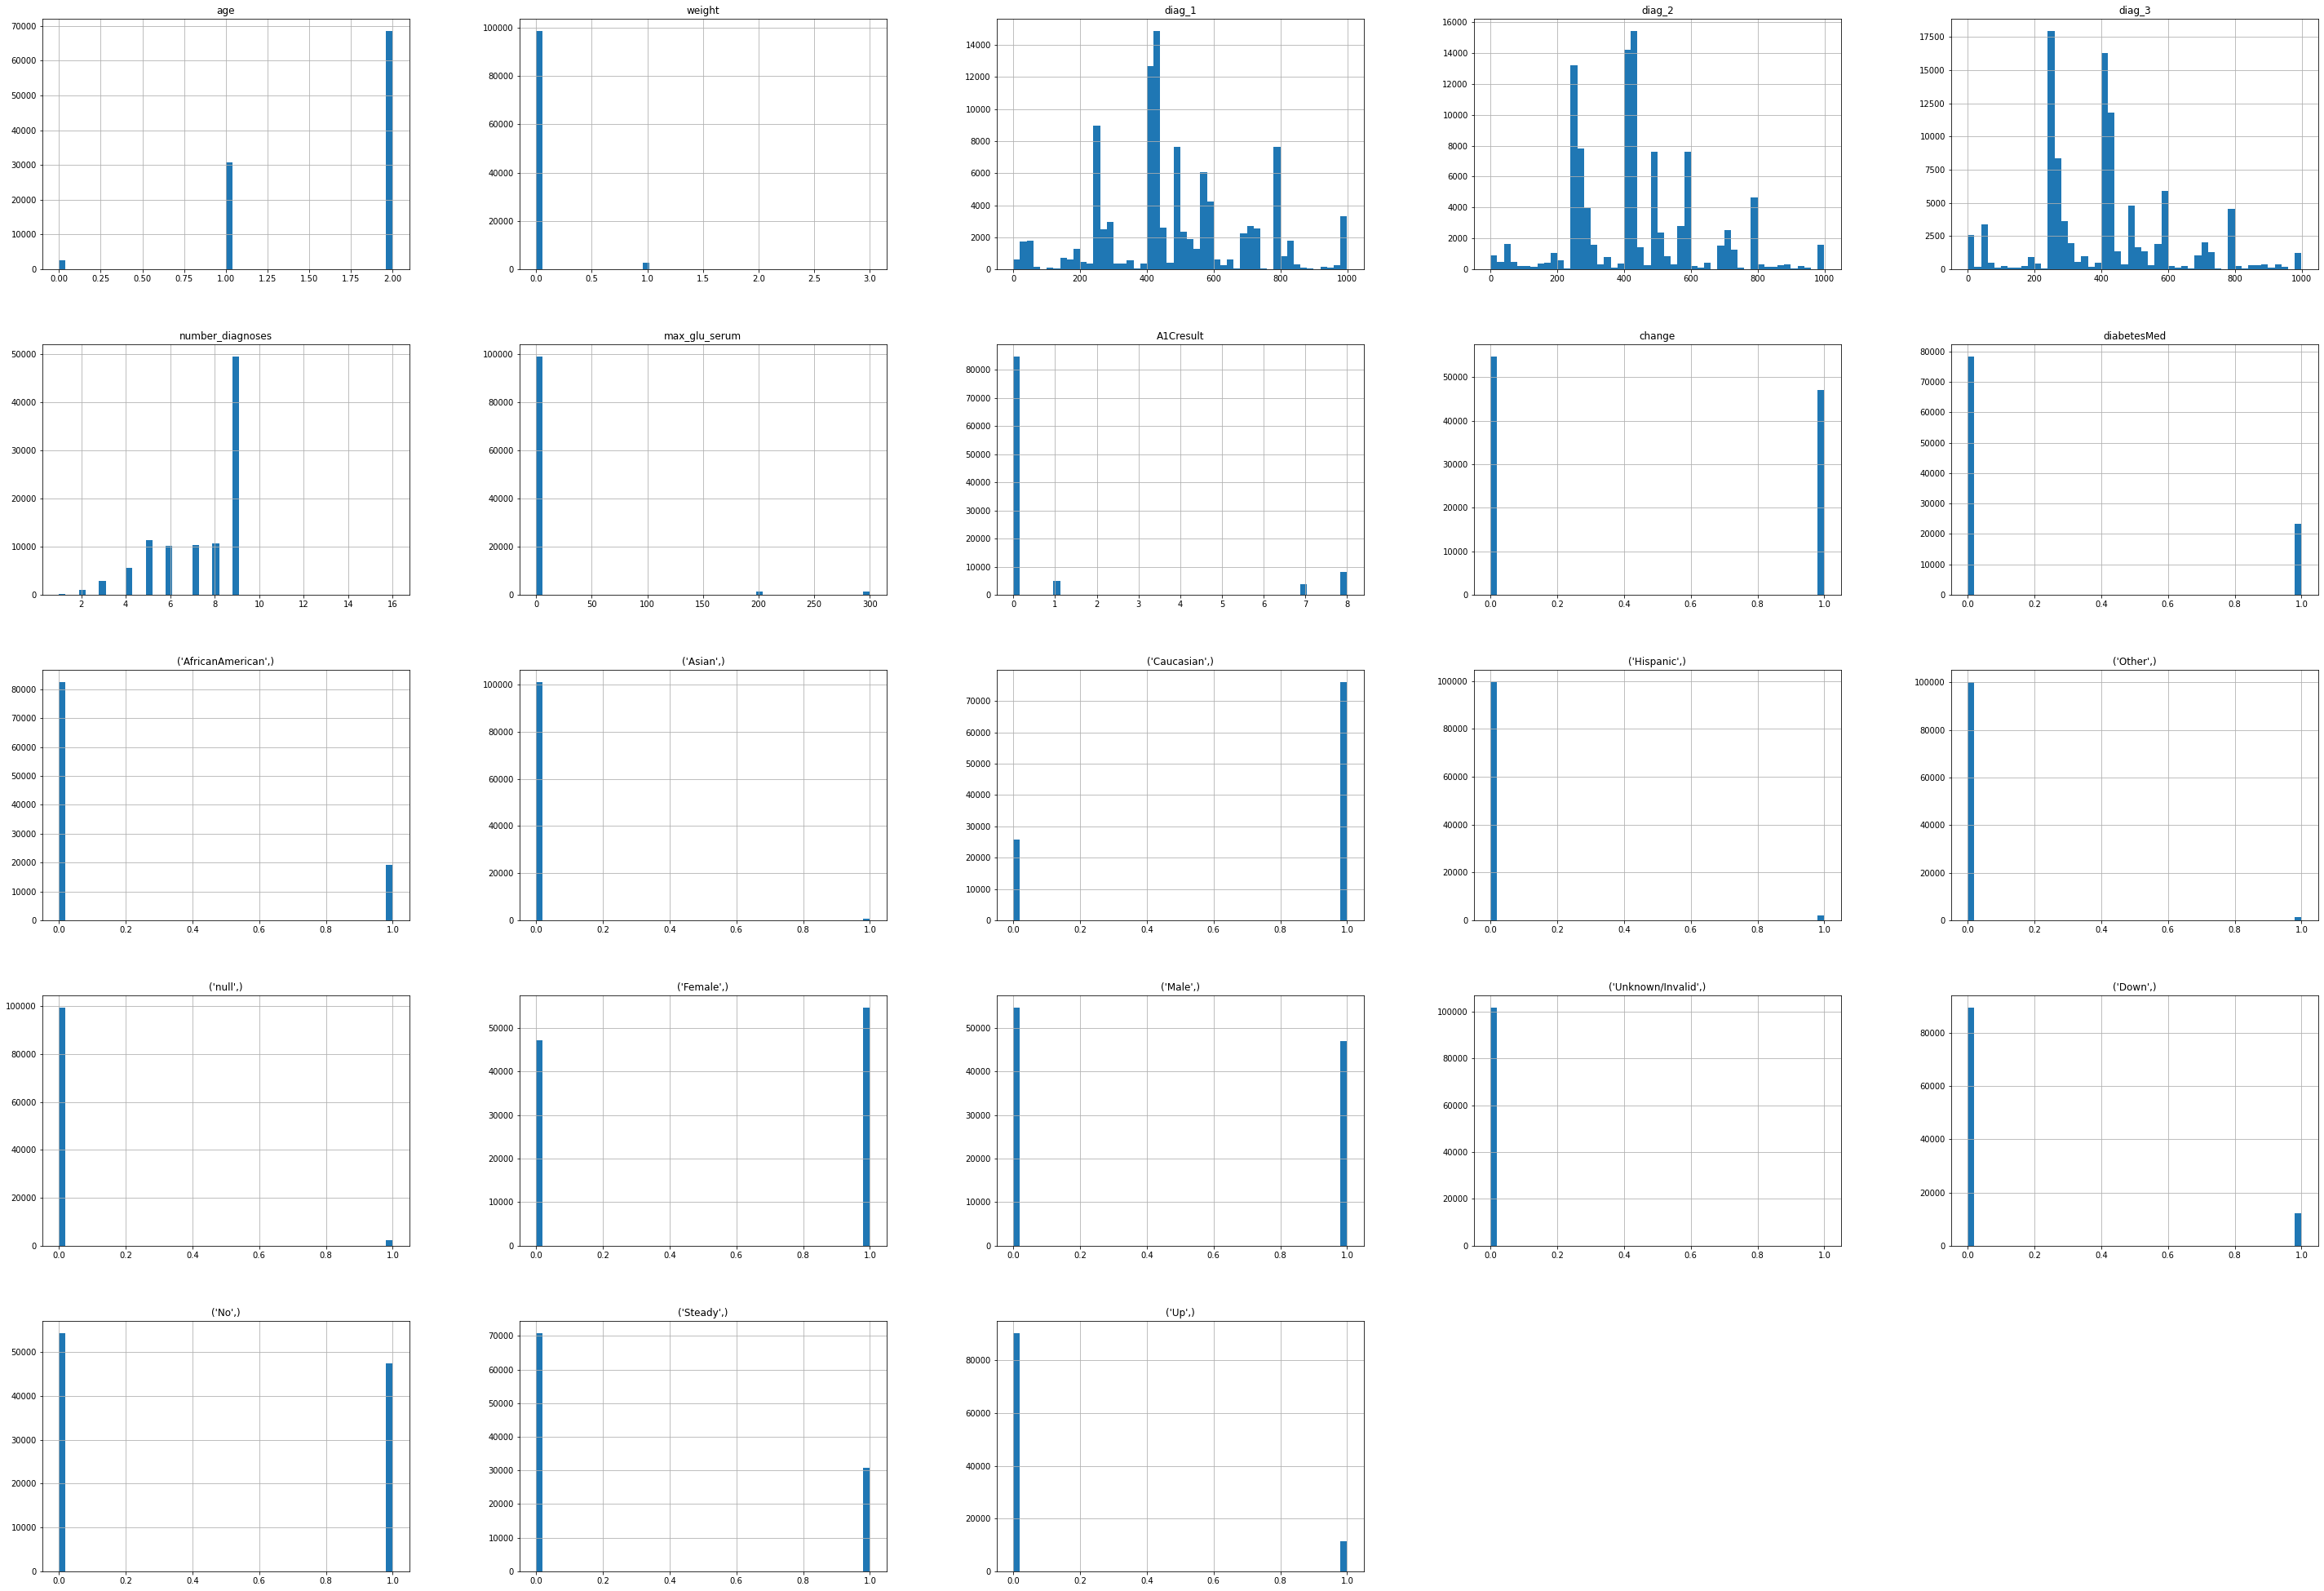

In [64]:
df.hist(bins=50,figsize=(50,35))

## Train Test Splitting

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

In [67]:
print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n")

Rows in train set:81412
 Rows in test set:20354



In [68]:
#equal distribution of class(0,1)-----------using Stratified Sampling

In [69]:
from sklearn.model_selection import StratifiedShuffleSplit

In [70]:
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [71]:
for train_index,test_index in split.split(df,df['diabetesMed']):
    strat_train_set= df.loc[train_index]
    strat_test_set= df.loc[test_index]

In [72]:
for train_index,test_index in split.split(df,df['change']):
    strat_train_set= df.loc[train_index]
    strat_test_set= df.loc[test_index]

In [73]:
strat_test_set

,age,weight,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,...,"(Hispanic,)","(Other,)","(null,)","(Female,)","(Male,)","(Unknown/Invalid,)","(Down,)","(No,)","(Steady,)","(Up,)"
17917,0,0,277.0,483.00,466.0,5,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
76349,1,0,584.0,250.42,728.0,9,0,8,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
57447,2,0,410.0,428.00,403.0,9,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2344,2,0,38.0,436.00,428.0,8,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
96081,2,0,570.0,584.00,276.0,9,0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86197,2,0,584.0,491.00,276.0,9,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6687,2,0,550.0,569.00,567.0,9,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
88848,1,0,440.0,414.00,45.0,9,0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
81524,2,0,428.0,585.00,496.0,8,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
strat_test_set.describe()

,age,weight,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,...,"(Hispanic,)","(Other,)","(null,)","(Female,)","(Male,)","(Unknown/Invalid,)","(Down,)","(No,)","(Steady,)","(Up,)"
count,20354.000000,20354.000000,20354.000000,20354.000000,20354.000000,20354.000000,20354.000000,20354.000000,20354.000000,20354.000000,...,20354.000000,20354.000000,20354.000000,20354.000000,20354.000000,20354.0,20354.000000,20354.000000,20354.000000,20354.000000
mean,1.653189,0.030756,488.094981,434.300273,402.751301,7.411369,6.771544,0.954407,0.461973,0.227965,...,0.019996,0.014346,0.022403,0.543972,0.456028,0.0,0.119829,0.461236,0.303921,0.115014
std,0.524207,0.182616,212.009207,189.151048,199.746557,1.945565,40.725753,2.474433,0.498564,0.419530,...,0.139990,0.118916,0.147995,0.498075,0.498075,0.0,0.324769,0.498507,0.459960,0.319047
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,410.000000,276.000000,250.600000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,435.000000,425.000000,401.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,595.000000,535.000000,496.000000,9.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.000000
max,2.000000,3.000000,999.000000,999.000000,999.000000,16.000000,300.000000,8.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [75]:
strat_test_set['diabetesMed'].value_counts()

0    15714
1     4640
Name: diabetesMed, dtype: int64

In [76]:
strat_train_set['diabetesMed'].value_counts()

0    62649
1    18763
Name: diabetesMed, dtype: int64

In [77]:
strat_test_set['change'].value_counts()

0    10951
1     9403
Name: change, dtype: int64

In [78]:
strat_train_set['change'].value_counts()

0    43804
1    37608
Name: change, dtype: int64

In [79]:
df = strat_train_set.copy()

## Correlations

In [80]:
# df.corr().T

In [81]:
corr_matrix = df.corr() # checking class correlations with other independent features.

In [82]:
corr_matrix['diabetesMed'].sort_values(ascending=False)

diabetesMed           1.000000
(No,)                 0.585007
weight                0.029452
diag_1                0.022153
(Female,)             0.017500
diag_2                0.008566
age                   0.007511
(Asian,)              0.007105
(Caucasian,)          0.005424
diag_3                0.004546
(AfricanAmerican,)    0.002159
(Hispanic,)           0.002152
(Unknown/Invalid,)    0.001483
(Other,)             -0.011741
(Male,)              -0.017518
(null,)              -0.017921
max_glu_serum        -0.018686
number_diagnoses     -0.020986
A1Cresult            -0.089540
(Up,)                -0.192633
(Down,)              -0.202202
(Steady,)            -0.360776
change               -0.507081
Name: diabetesMed, dtype: float64

In [83]:
df.columns

Index([               'age',             'weight',             'diag_1',
                   'diag_2',             'diag_3',   'number_diagnoses',
            'max_glu_serum',          'A1Cresult',             'change',
              'diabetesMed', ('AfricanAmerican',),           ('Asian',),
             ('Caucasian',),        ('Hispanic',),           ('Other',),
                  ('null',),          ('Female',),            ('Male',),
       ('Unknown/Invalid',),            ('Down',),              ('No',),
                ('Steady',),              ('Up',)],
      dtype='object')

## Plotting Graphs

In [84]:
from pandas.plotting import scatter_matrix
attributes = ["diabetesMed","change","weight"]

array([[<AxesSubplot:xlabel='diabetesMed', ylabel='diabetesMed'>,
        <AxesSubplot:xlabel='change', ylabel='diabetesMed'>,
        <AxesSubplot:xlabel='weight', ylabel='diabetesMed'>],
       [<AxesSubplot:xlabel='diabetesMed', ylabel='change'>,
        <AxesSubplot:xlabel='change', ylabel='change'>,
        <AxesSubplot:xlabel='weight', ylabel='change'>],
       [<AxesSubplot:xlabel='diabetesMed', ylabel='weight'>,
        <AxesSubplot:xlabel='change', ylabel='weight'>,
        <AxesSubplot:xlabel='weight', ylabel='weight'>]], dtype=object)

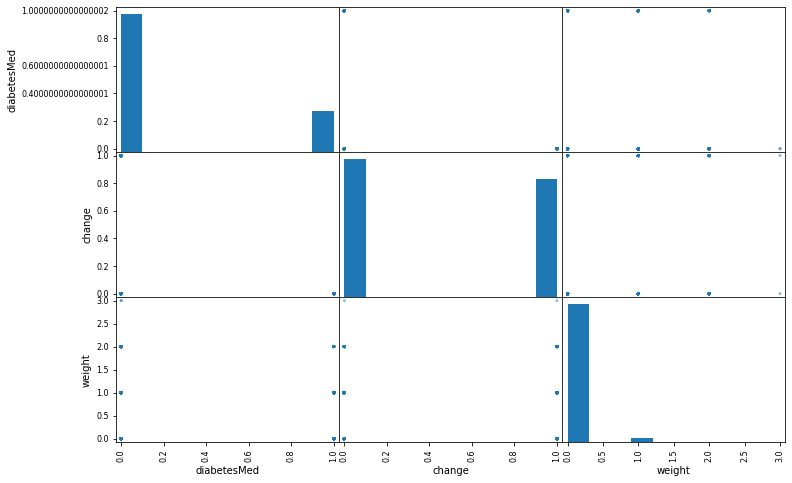

In [85]:
scatter_matrix(df[attributes],figsize=(12,8))

## Plotting Graph between two relations

In [86]:
#df.plot(kind="scatter",x="Amount",y="Time",alpha=0.8)

### Splitting Features and Labels

In [87]:
df= strat_train_set.drop("diabetesMed",axis=1)
df_labels = strat_train_set["diabetesMed"].copy()

In [88]:
df.head()

,age,weight,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,"(AfricanAmerican,)",...,"(Hispanic,)","(Other,)","(null,)","(Female,)","(Male,)","(Unknown/Invalid,)","(Down,)","(No,)","(Steady,)","(Up,)"
34366,2,0,38.0,276.00,518.00,6,0,8,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16373,2,0,410.0,250.01,414.00,6,300,0,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
11129,2,0,584.0,414.00,250.00,7,0,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
75998,1,0,434.0,401.00,250.00,4,0,8,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
25752,2,0,491.0,428.00,250.02,9,0,8,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
df_labels.head()

34366    0
16373    0
11129    1
75998    0
25752    0
Name: diabetesMed, dtype: int64

## Selecting a desired Model for Project

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model = LogisticRegression(tol = 0.1, solver = "lbfgs")

### Training the Logistic Regression Model with Training Data

In [92]:
model.fit(df,df_labels)

c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

## Model Evaluation

### Accuracy Scores

In [93]:
from sklearn.metrics import accuracy_score
df_prediction = model.predict(df)
training_data_accuracy = accuracy_score(df_prediction,df_labels)

In [94]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8440033410308063


In [95]:
from sklearn.model_selection import cross_val_predict
df_labels_prediction = cross_val_predict(model,df,df_labels,cv=3)

c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [96]:
df_labels_prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [97]:
#Calculating confusion matrix

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
confusion_matrix(df_labels,df_labels_prediction) #here true negative value=227339(not fraud) and true positive=265(fraud)
#also it wrongly detect that 129(fraud) and 112 is not fraud

array([[52387, 10262],
       [ 2429, 16334]], dtype=int64)

In [100]:
#confusion matrix---tells us difference between actual and predicted values

In [101]:
#confusion_matrix(df_labels,df_labels)----------this is the C.M. for perfect predictions

In [102]:
# Precision and Recall

In [103]:
from sklearn.metrics import precision_score , recall_score

In [104]:
#This is my precision score
precision_score(df_labels , df_labels_prediction)

0.6141525041359603

In [105]:
#This is my recall score
recall_score(df_labels , df_labels_prediction)

0.8705430901241805

In [106]:
#F1 Score--------it is harmonic mean of Precision and Recall

In [107]:
from sklearn.metrics import f1_score

In [108]:
f1_score(df_labels , df_labels_prediction)

0.7202098811702197

In [109]:
# check Classification Report

In [110]:
from sklearn.metrics import classification_report
print(classification_report(df_labels,df_prediction))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     62649
           1       0.61      0.87      0.72     18763

    accuracy                           0.84     81412
   macro avg       0.79      0.85      0.81     81412
weighted avg       0.88      0.84      0.85     81412



In [111]:
print(df.iloc[2])

age                     2.0
weight                  0.0
diag_1                584.0
diag_2                414.0
diag_3                250.0
number_diagnoses        7.0
max_glu_serum           0.0
A1Cresult               0.0
change                  0.0
(AfricanAmerican,)      0.0
(Asian,)                0.0
(Caucasian,)            1.0
(Hispanic,)             0.0
(Other,)                0.0
(null,)                 0.0
(Female,)               1.0
(Male,)                 0.0
(Unknown/Invalid,)      0.0
(Down,)                 0.0
(No,)                   1.0
(Steady,)               0.0
(Up,)                   0.0
Name: 11129, dtype: float64


In [112]:
a = model.predict(([[2.0,0.0,584.0,414.0,250.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,.0,0.0]]))

In [113]:
if a==0:
    print("diabetic")
else:
    print("n0t-diabetic")

n0t-diabetic


### Testing the Model on Test dataset

In [114]:
X_test = strat_test_set.drop("diabetesMed",axis=1)
Y_test = strat_test_set["diabetesMed"].copy()

In [115]:
X_test.head()

,age,weight,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,"(AfricanAmerican,)",...,"(Hispanic,)","(Other,)","(null,)","(Female,)","(Male,)","(Unknown/Invalid,)","(Down,)","(No,)","(Steady,)","(Up,)"
17917,0,0,277.0,483.00,466.0,5,0,1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
76349,1,0,584.0,250.42,728.0,9,0,8,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
57447,2,0,410.0,428.00,403.0,9,0,0,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2344,2,0,38.0,436.00,428.0,8,0,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
96081,2,0,570.0,584.00,276.0,9,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [116]:
Y_test.head()

17917    0
76349    0
57447    0
2344     0
96081    1
Name: diabetesMed, dtype: int64

### Testing the Logistic Regression Model with Testing Data

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol = 0.1, solver = 'lbfgs')
model.fit(X_test,Y_test)

c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [118]:
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [119]:
print('Accuracy on training data:',testing_data_accuracy)

Accuracy on training data: 0.8455831777537585


In [120]:
from sklearn.model_selection import cross_val_predict
Y_test_prediction = cross_val_predict(model,X_test,Y_test,cv=3)

c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [121]:
Y_test_prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [122]:
# confusion matrix

In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
confusion_matrix(Y_test,Y_test_prediction)

array([[13020,  2694],
       [  460,  4180]], dtype=int64)

In [125]:
from sklearn.metrics import precision_score , recall_score

In [126]:
precision_score(Y_test,Y_test_prediction)

0.6080884492289788

In [127]:
recall_score(Y_test,Y_test_prediction)

0.9008620689655172

In [128]:
from sklearn.metrics import f1_score

In [129]:
f1_score(Y_test,Y_test_prediction)

0.726072607260726

In [130]:
#check classification report
from sklearn.metrics import classification_report
print(classification_report(df_labels,df_prediction))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     62649
           1       0.61      0.87      0.72     18763

    accuracy                           0.84     81412
   macro avg       0.79      0.85      0.81     81412
weighted avg       0.88      0.84      0.85     81412



In [131]:
#b= model.predict(([[]]))

In [132]:
#if b==0:
   # print("not-fraud")
#else:
    #print("fraud")